# Assignment 4: Apply NB
                                                                                Submitted By- Rahul P Dable

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

#### <font color = 'Green'> CODE REFERENCE: Notebook 5_Reference_SampleSolution by AAIC </font>


<h1> Naive Bayes </h1>

#### 1 Loading Data

In [1]:
import pandas as pd
import numpy as np
total_rows_selected = 50000
data = pd.read_csv('preprocessed_data.csv',  nrows=total_rows_selected)
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


#### <font color = 'blue'>NOTE</font>
<font color = 'green'>It seems that **project_title** feature is missing in **preprocessed_data.csv**
    
 Let's pick that feature from **train_data.csv**, preprocess and attach it to **preprocessed_data.csv**</font>


**Preprocessing Text Data**

In [2]:
data_train = pd.read_csv('train_data.csv',  nrows=total_rows_selected)

In [3]:
#CODE Reference:Notebook 5_Reference_SampleSolution by AAIC
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't", "they", "many"]

# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text



Preprocessing **project_title** 

In [4]:
preprocessed_titles = preprocess_text(data_train['project_title'].values)
data['project_title'] = preprocessed_titles

100%|██████████| 50000/50000 [00:02<00:00, 23150.59it/s]


Preprocessing **essay**

In [5]:
preprocessed_essays = preprocess_text(data['essay'].values)
data['preprocessed_essays'] = preprocessed_essays

100%|██████████| 50000/50000 [00:33<00:00, 1505.75it/s]


#### 1.1 Setting up target variable

In [6]:
y = data['project_is_approved']
X = data.drop(['project_is_approved', 'essay'], axis=1)

In [7]:
X.columns.values

array(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'price', 'project_title',
       'preprocessed_essays'], dtype=object)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y )
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.33, stratify = y_train)
#print('length of X_train is {0}, X_cv is {2} and X_test is {1}'.format(len(X_train), len(X_test), len(X_cv)))

In [9]:
X_train.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,price,project_title,preprocessed_essays
45413,ut,mrs,grades_6_8,27,music_arts,music,359.24,computers stem achievement math,always remember enormous grins beaming faces s...
25046,az,ms,grades_prek_2,6,health_sports specialneeds,health_wellness specialneeds,611.82,project based learning calculus brings math life,classroom full youngsters excited learning gro...


<h3>2 Make Data Model Ready: encoding eassay, and project_title</h2>

#### 2.1 BOW

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values)

X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
#X_cv_essay_bow    = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_bow  = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
#print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

essay_features_BOW = vectorizer.get_feature_names()

After vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


Similarly for **project_title**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=5,ngram_range=(1,4), max_features=None)
vectorizer.fit(X_train['project_title'].values)

X_train_title_bow = vectorizer.transform(X_train['project_title'].values)
#X_cv_title_bow    = vectorizer.transform(X_cv['project_title'].values)
X_test_title_bow  = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
#print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)

title_features_BOW = vectorizer.get_feature_names()

After vectorizations
(33500, 5004) (33500,)
(16500, 5004) (16500,)


#### 2.2 TFIDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_essays'].values)

X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
#X_cv_essay_tfidf    = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_tfidf  = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
#print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
 
essay_features_tfidf = vectorizer.get_feature_names()

After vectorizations
(33500, 10270) (33500,)
(16500, 10270) (16500,)


#### 2.3 Repeat same steps for project titles


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5)
vectorizer.fit(X_train['project_title'].values)

X_train_title_tfidf = vectorizer.transform(X_train['project_title'].values)
#X_cv_title_tfidf    = vectorizer.transform(X_cv['project_title'].values)
X_test_title_tfidf  = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
#print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
 
title_features_tfidf = vectorizer.get_feature_names()

After vectorizations
(33500, 2563) (33500,)
(16500, 2563) (16500,)


____

<h2>2.4 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>2.4.1 encoding categorical features: School State</h3>

In [14]:
#CODE Reference:Notebook 5_Reference_SampleSolution by AAIC
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
#X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
#print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
school_state_BOW = vectorizer.get_feature_names()

After vectorizations
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>2.4.2 encoding categorical features: teacher_prefix</h3>

In [15]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
#X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

teacher_prefix_BOW = vectorizer.get_feature_names()

After vectorizations
(33500, 5) (33500,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3>2.4.3 encoding categorical features: project_grade_category</h3>

In [16]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
#X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

project_grade_cat_BOW = vectorizer.get_feature_names()

After vectorizations
(33500, 4) (33500,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 2.4.4 Preprocessing Categorical Features:clean_categories

In [17]:
vectorizer.fit(X_train['clean_categories'].values)

X_train_cleancat_ohe = vectorizer.transform(X_train['clean_categories'].values)
#X_cv_cleancat_ohe    = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cleancat_ohe  = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cleancat_ohe.shape, y_train.shape)
#print(X_cv_cleancat_ohe.shape, y_cv.shape)
print(X_test_cleancat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

clean_cat_BOW = vectorizer.get_feature_names()

After vectorizations
(33500, 9) (33500,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### 2.4.5 Preprocessing Categorical Features:clean_subcategories

In [18]:
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_cleansubcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
#X_cv_cleansubcat_ohe    = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_cleansubcat_ohe  = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_cleansubcat_ohe.shape, y_train.shape)
#print(X_cv_cleansubcat_ohe.shape, y_cv.shape)
print(X_test_cleansubcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

clean_subcat_BOW = vectorizer.get_feature_names()

After vectorizations
(33500, 30) (33500,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


### 2.4.6 Preprocessing Numerical Features: teacher_number_of_previously_posted_projects

In [19]:
from sklearn.preprocessing import Normalizer

In [20]:
#CODE Reference:Notebook 5_Reference_SampleSolution by AAIC
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

X_train_teacherprojects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
#X_cv_teacherprojects_norm    = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacherprojects_norm  = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacherprojects_norm.shape, y_train.shape)
#print(X_cv_teacherprojects_norm.shape, y_cv.shape)
print(X_test_teacherprojects_norm.shape, y_test.shape)
print("="*100)

teacherproj_feature =['teacher_number_of_previously_posted_projects']


After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### 2.4.7 Preprocessing Numerical Features: price

In [21]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
#print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

price_feature = ['price']

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### 3 Concatenating all the features:

**A. Appending all the features names**

In [22]:
from itertools import chain
all_features_BOW = list(chain(essay_features_BOW, school_state_BOW, teacher_prefix_BOW, 
                          project_grade_cat_BOW, clean_cat_BOW, clean_subcat_BOW, 
                          teacherproj_feature, price_feature, title_features_BOW))
print("Number of features with BOW", len(all_features_BOW))

all_features_TFIDF = list(chain(essay_features_tfidf, school_state_BOW, teacher_prefix_BOW, 
                          project_grade_cat_BOW, clean_cat_BOW, clean_subcat_BOW, 
                          teacherproj_feature, price_feature, title_features_tfidf))
print("Number of features with TFIDF", len(all_features_TFIDF))

Number of features with BOW 10105
Number of features with TFIDF 12934


#### <font color = 'red'> NOTE:  Need to maintain same order while creating hstack
</font>

 As we have encoded all the required features into sparse matrix, next step we want to do is to concatenate everything indo single data matrix.
 
 
    scipy.sparse.csr_matrix
    class scipy.sparse.csr_matrix(arg1, shape=None, dtype=None, copy=False)
    Compressed Sparse Row matrix

In [23]:
from scipy.sparse import hstack

**For BOW**

In [24]:
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, 
               X_train_cleancat_ohe, X_train_cleansubcat_ohe, X_train_teacherprojects_norm, 
               X_train_price_norm, X_train_title_bow), ).tocsr()
#X_cv = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, 
               #X_cv_cleancat_ohe, X_cv_cleansubcat_ohe, X_cv_teacherprojects_norm, 
               #X_cv_price_norm, X_cv_title_bow), ).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, 
               X_test_cleancat_ohe, X_test_cleansubcat_ohe, X_test_teacherprojects_norm, 
               X_test_price_norm, X_test_title_bow), ).tocsr()


print("Final Data matrix")
print(X_tr.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 10105) (33500,)
(16500, 10105) (16500,)


**For TFIDF**

In [25]:
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, 
                     X_train_cleancat_ohe, X_train_cleansubcat_ohe, X_train_teacherprojects_norm, 
                     X_train_price_norm, X_train_title_tfidf), ).tocsr()
#X_cv_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, 
                     #X_cv_cleancat_ohe, X_cv_cleansubcat_ohe, X_cv_teacherprojects_norm, 
                     #X_cv_price_norm, X_cv_title_tfidf), ).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, 
                     X_test_cleancat_ohe, X_test_cleansubcat_ohe, X_test_teacherprojects_norm, 
                     X_test_price_norm, X_test_title_tfidf), ).tocsr()


print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
#print(X_cv_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 12934) (33500,)
(16500, 12934) (16500,)


### 5. Appling NB on different kind of featurization as mentioned in the instructions
 

**Instructions**

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
  -You need to plot the performance of model both on train data and cross validation data for each hyper parameter.
        Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.

# FOR BOW

#### A. Using MultinomialNB on BOW featurization

Best cross-validation score: 0.69
Best parameters:  {'alpha': 2}


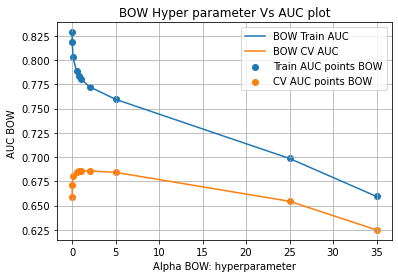

In [26]:
#CODE Reference:Notebook 5_Reference_SampleSolution by AAIC
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt


naive_bayes= MultinomialNB()
parameters = {'alpha': [0.001, 0.01, 0.1, 0.5, 0.8, 1, 2, 5, 10, 25, 35]}

clf_randomsearch = RandomizedSearchCV(naive_bayes, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf_randomsearch.fit(X_tr, y_train)

print("Best cross-validation score: {:.2f}".format(clf_randomsearch.best_score_))
print("Best parameters: ", clf_randomsearch.best_params_)

results = pd.DataFrame.from_dict(clf_randomsearch.cv_results_)
results = results.sort_values('param_alpha')
#print(results[0:3])

train_auc_BOW= results['mean_train_score']
train_auc_std_BOW= results['std_train_score']
cv_auc_BOW = results['mean_test_score'] 
cv_auc_std_BOW= results['std_test_score']
alpha_BOW =  results['param_alpha']


plt.plot(alpha_BOW, train_auc_BOW, label='BOW Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha_BOW, cv_auc_BOW, label='BOW CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha_BOW, train_auc_BOW, label='Train AUC points BOW')
plt.scatter(alpha_BOW, cv_auc_BOW, label='CV AUC points BOW')


plt.legend()
plt.xlabel("Alpha BOW: hyperparameter")
plt.ylabel("AUC BOW ")
plt.title("BOW Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

BOW_best_score = clf_randomsearch.best_score_
BOW_best_alpha = clf_randomsearch.best_params_
BOW_best_alpha = BOW_best_alpha.get('alpha')

#results.head()

**Training model with best alpha**

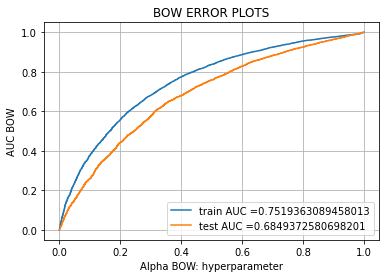

In [27]:
#CODE Reference:Notebook 5_Reference_SampleSolution by AAIC
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_alpha = clf_randomsearch.best_params_
best_alpha = best_alpha.get('alpha')

naive_bayes = MultinomialNB(alpha=best_alpha)
naive_bayes.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = naive_bayes.predict_proba(X_tr)[:,1]    
y_test_pred = naive_bayes.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha BOW: hyperparameter")
plt.ylabel("AUC BOW")
plt.title("BOW ERROR PLOTS")
plt.grid()
plt.show()


Along with plotting ROC curve, need to print the confusion matrix with predicted and original labels of test data points

In [28]:
from sklearn.metrics import roc_curve, auc

In [29]:
#CODE Reference:Notebook 5_Reference_SampleSolution by AAIC
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [30]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("-"*20)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print("="*100)

the maximum value of tpr*(1-fpr) 0.47815572336214807 for threshold 0.909
Train confusion matrix
[[ 3821  1544]
 [ 9246 18889]]
--------------------
Test confusion matrix
[[1651  991]
 [4698 9160]]


# Similarly for TFIDF

Best cross-validation score: 0.62
Best parameters:  {'alpha': 0.1}


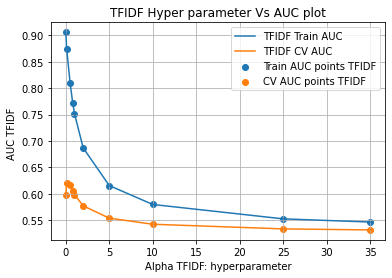

In [31]:
#CODE Reference:Notebook 5_Reference_SampleSolution by AAIC
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV


naive_bayes= MultinomialNB()
parameters = {'alpha': [0.001, 0.01, 0.1, 0.5, 0.8, 1, 2, 5, 10, 25, 35]}

tfidf_randomsearch = RandomizedSearchCV(naive_bayes, parameters, cv=3, scoring='roc_auc',return_train_score=True)
tfidf_randomsearch.fit(X_tr_tfidf, y_train)

print("Best cross-validation score: {:.2f}".format(tfidf_randomsearch.best_score_))
print("Best parameters: ", tfidf_randomsearch.best_params_)

results = pd.DataFrame.from_dict(tfidf_randomsearch.cv_results_)
results = results.sort_values('param_alpha')
#print(results[0:3])

train_auc_tfidf= results['mean_train_score']
train_auc_std_tfidf= results['std_train_score']
cv_auc_tfidf = results['mean_test_score'] 
cv_auc_std_tfidf= results['std_test_score']
alpha_tfidf =  results['param_alpha']


plt.plot(alpha_tfidf, train_auc_tfidf, label='TFIDF Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha_tfidf, cv_auc_tfidf, label='TFIDF CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha_tfidf, train_auc_tfidf, label='Train AUC points TFIDF')
plt.scatter(alpha_tfidf, cv_auc_tfidf, label='CV AUC points TFIDF')


plt.legend()
plt.xlabel("Alpha TFIDF: hyperparameter")
plt.ylabel("AUC TFIDF ")
plt.title("TFIDF Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

TFIDF_best_score = tfidf_randomsearch.best_score_
TFIDF_best_alpha = tfidf_randomsearch.best_params_
TFIDF_best_alpha = TFIDF_best_alpha.get('alpha')

#results.head()

**Training model with best alpha**

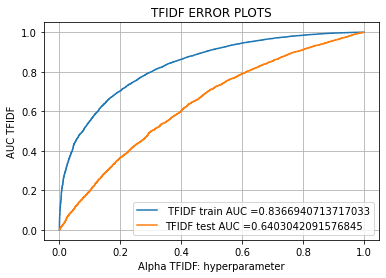

In [32]:
#CODE Reference:Notebook 5_Reference_SampleSolution by AAIC
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

tfidf_best_alpha = tfidf_randomsearch.best_params_
tfidf_best_alpha = tfidf_best_alpha.get('alpha')

naive_bayes = MultinomialNB(alpha=tfidf_best_alpha)
naive_bayes.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_tfidf = naive_bayes.predict_proba(X_tr_tfidf)[:,1]   
y_test_pred_tfidf = naive_bayes.predict_proba(X_te_tfidf)[:,1]

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label=" TFIDF train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="TFIDF test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("Alpha TFIDF: hyperparameter")
plt.ylabel("AUC TFIDF")
plt.title("TFIDF ERROR PLOTS")
plt.grid()
plt.show()


Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points

In [33]:
#CODE Reference:Notebook 5_Reference_SampleSolution by AAIC
print("="*100)
from sklearn.metrics import confusion_matrix
best_t_tfidf = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_tfidf, best_t_tfidf)))
print("-"*20)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_tfidf, best_t_tfidf)))
print("="*100)

the maximum value of tpr*(1-fpr) 0.5683762169847117 for threshold 0.843
Train confusion matrix
[[ 4147  1218]
 [ 7447 20688]]
--------------------
Test confusion matrix
[[1376 1266]
 [4281 9577]]


________

**4.TASK:** Find the top 20 features from either from feature Set 1 or feature Set 2 using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names.

**Notes**
Models like logistic regression, or Naive Bayes algorithm, predict the probabilities of observing some outcomes. In standard binary regression scenario the models give you probability of observing the "success" category. In multinomial case, the models return probabilities of observing each of the outcomes. Log probabilities are simply natural logarithms of the predicted probabilities. reference: https://stats.stackexchange.com/questions/266031/what-is-log-probability-of-feature-in-sklearn-multinomialnb


    feature_log_prob_ndarray of shape (n_classes, n_features)
    Empirical log probability of features given a class, P(x_i|y).
    
also refer https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes

In [34]:
def top_features(data, class_labels, all_features , best_alpha, top_required_features = 20):    
    naive_bayes = MultinomialNB(best_alpha)
    naive_bayes.fit(data, class_labels)
    
    #Reference: https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes
    BOW_feature_log_prob = naive_bayes.feature_log_prob_
    
    
    classwise_log_features = []
    total_class_labels = list(set(list(class_labels)))
    for i in range(len(total_class_labels)):
        class_prob_sorted = naive_bayes.feature_log_prob_[i, :].argsort()
        BOW_top_features_index = list(class_prob_sorted[-top_required_features:])
        BOW_top_features= []
        for index in BOW_top_features_index:
            BOW_top_features.append(all_features[index])
        classwise_log_features.append(BOW_top_features)
    return total_class_labels, BOW_feature_log_prob, classwise_log_features 

**For BOW**

In [35]:
top_required_features = 20
best_alpha = BOW_best_alpha
all_features = all_features_BOW
total_class_labels, BOW_feature_log_prob, classwise_log_features = top_features(X_tr, y_train, all_features, 
                                                                                best_alpha, top_required_features)

for i in range(len(BOW_feature_log_prob)):
    print("Log propabilities for TOP feature for class {0} are {1} :".format(total_class_labels[i],BOW_feature_log_prob[i]))
    print("-"*25)
    print("Top {0} features for class {1} are {2} :".format(top_required_features, 
                                                            total_class_labels[i], classwise_log_features[i] ))
    print("="*50)

Log propabilities for TOP feature for class 0 are [-10.06947802  -8.76542175  -7.89592318 ... -12.32076981 -12.60845189
 -12.60845189] :
-------------------------
Top 20 features for class 0 are ['want', 'skills', 'love', 'reading', 'day', 'teacher_number_of_previously_posted_projects', 'able', 'year', 'come', 'work', 'need', 'nannan', 'price', 'help', 'learn', 'not', 'classroom', 'learning', 'school', 'students'] :
Log propabilities for TOP feature for class 1 are [ -9.87737089  -8.53882557  -7.9590487  ... -13.79736207 -13.61504051
 -13.10421489] :
-------------------------
Top 20 features for class 1 are ['class', 'year', 'come', 'teacher_number_of_previously_posted_projects', 'love', 'day', 'able', 'use', 'need', 'reading', 'work', 'nannan', 'price', 'help', 'learn', 'not', 'learning', 'classroom', 'school', 'students'] :


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass alpha=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


**For TFIDF**

In [36]:
top_required_features = 20
best_alpha = TFIDF_best_alpha
all_features = all_features_TFIDF
total_class_labels, TFIDF_feature_log_prob, classwise_log_features = top_features(X_tr_tfidf, y_train, 
                                                                                all_features, best_alpha, top_required_features)
for i in range(len(TFIDF_feature_log_prob)):
    print("Log propabilities for TOP feature for class {0} are {1} :".format(total_class_labels[i],TFIDF_feature_log_prob[i]))
    print("-"*25)
    print("Top {0} features for class {1} are {2} :".format(top_required_features, 
                                                            total_class_labels[i], classwise_log_features[i] ))
    print("="*50)

Log propabilities for TOP feature for class 0 are [-10.43724525 -10.15705407  -9.04631673 ... -11.27303094 -11.76362243
 -11.54375425] :
-------------------------
Top 20 features for class 0 are ['appliedsciences', 'appliedlearning', 'health_wellness', 'specialneeds', 'specialneeds', 'students', 'ca', 'grades_6_8', 'health_sports', 'literature_writing', 'mathematics', 'literacy', 'grades_3_5', 'ms', 'math_science', 'grades_prek_2', 'literacy_language', 'mrs', 'teacher_number_of_previously_posted_projects', 'price'] :
Log propabilities for TOP feature for class 1 are [-10.88911382  -9.93265679  -8.83732297 ... -12.56871803 -11.97645437
 -11.39199302] :
-------------------------
Top 20 features for class 1 are ['grades_9_12', 'appliedlearning', 'specialneeds', 'specialneeds', 'students', 'health_wellness', 'ca', 'grades_6_8', 'health_sports', 'literature_writing', 'mathematics', 'literacy', 'grades_3_5', 'ms', 'math_science', 'grades_prek_2', 'literacy_language', 'mrs', 'teacher_number_o

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass alpha=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


_______________

## Summary 
Printing Results in a Tabular Form

In [37]:
#Code Reference: http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
t = PrettyTable(['Vectorizer', 'Model', 'Hyper-parameter Alpha', 'AUC'])
t.add_row(['BOW', 'NB' , BOW_best_alpha , BOW_best_score])
t.add_row(['TF-IDF', 'NB' , TFIDF_best_alpha , TFIDF_best_score])
print(t)

+------------+-------+-----------------------+--------------------+
| Vectorizer | Model | Hyper-parameter Alpha |        AUC         |
+------------+-------+-----------------------+--------------------+
|    BOW     |   NB  |           2           | 0.6857423588408089 |
|   TF-IDF   |   NB  |          0.1          | 0.620818486800397  |
+------------+-------+-----------------------+--------------------+


________